<a href="https://colab.research.google.com/github/anhquoccoi/homework/blob/main/CIFAR10CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CIFAR10
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten
from keras.datasets import cifar100, cifar10
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_pre = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [ ]:
opt= 'adam'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs= 25,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/25
782/782 [==============================] - 4s 5ms/step - loss: 1.0833 - accuracy: 0.6155 - val_loss: 1.0402 - val_accuracy: 0.6356
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9410 - accuracy: 0.6681 - val_loss: 1.0393 - val_accuracy: 0.6342
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 0.8516 - accuracy: 0.6996 - val_loss: 0.9604 - val_accuracy: 0.6735
Epoch 4/25
782/782 [==============================] - 4s 4ms/step - loss: 0.7748 - accuracy: 0.7264 - val_loss: 0.9523 - val_accuracy: 0.6777
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 0.7045 - accuracy: 0.7534 - val_loss: 0.9613 - val_accuracy: 0.6714
Epoch 6/25
782/782 [==============================] - 4s 4ms/step - loss: 0.6456 - accuracy: 0.7719 - val_loss: 0.9515 - val_accuracy: 0.6866
Epoch 7/25
782/782 [==============================] - 4s 4ms/step - loss: 0.5891 - accuracy: 0.7905 - val_loss: 0.9606 - val_accuracy: 0.6875
Epoch 

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

NameError: ignored

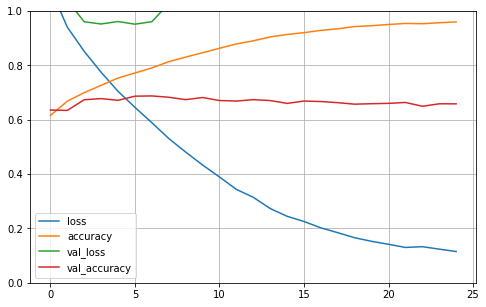

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

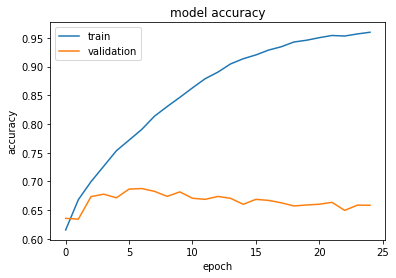

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

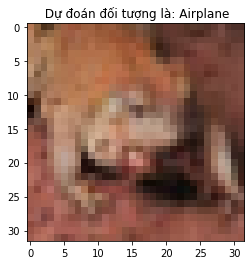

In [ ]:
Label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

test = 5
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))